In [2]:
import numpy as np
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import umap
import math
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib import colors
import matplotlib.transforms as mtrans
import yaml
from yaml.loader import SafeLoader
from collections import OrderedDict
#from verstack.stratified_continuous_split import scsplit
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import seaborn as sns
import random as rd

/tmp/ipykernel_3307186/977777567.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/volatile/jl277509/Runs/02_STS_babies/Program/2023_jlaval_STSbabies/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
out_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/'
model = 'tmp/16-36-43_0/'
epochs = range(0,250,50)

In [47]:
# load dHCP labels
preterm_labels = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/preterm_labels_sub.csv')

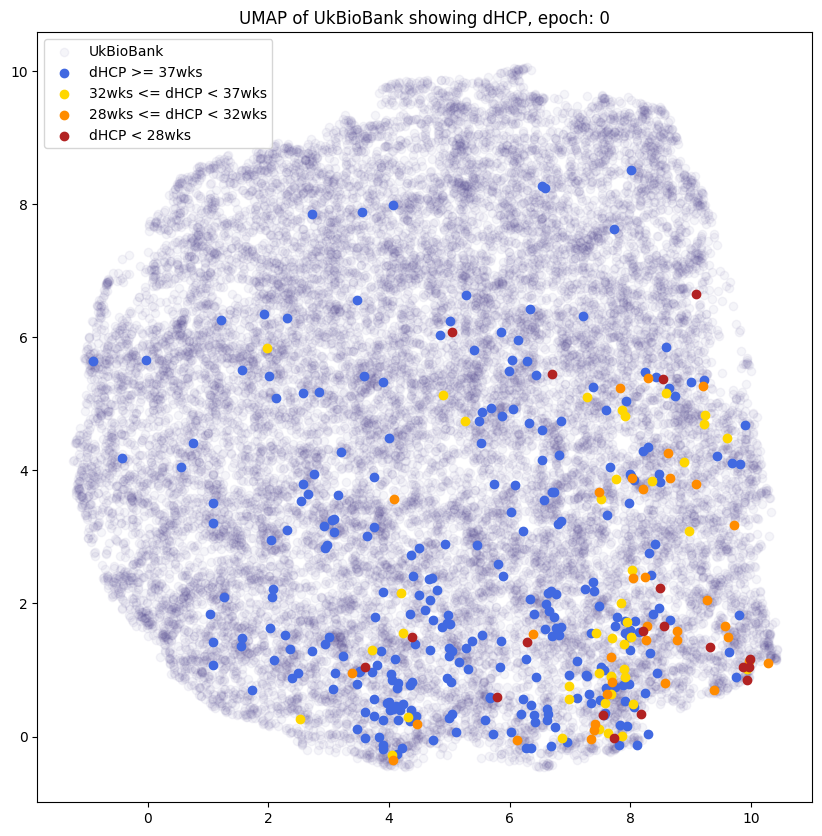

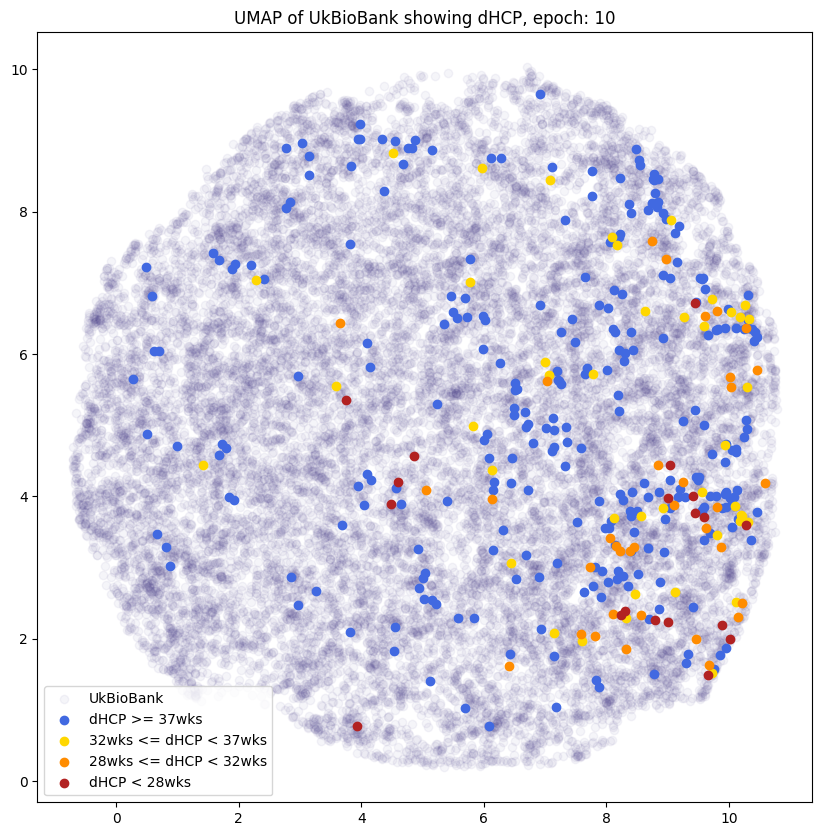

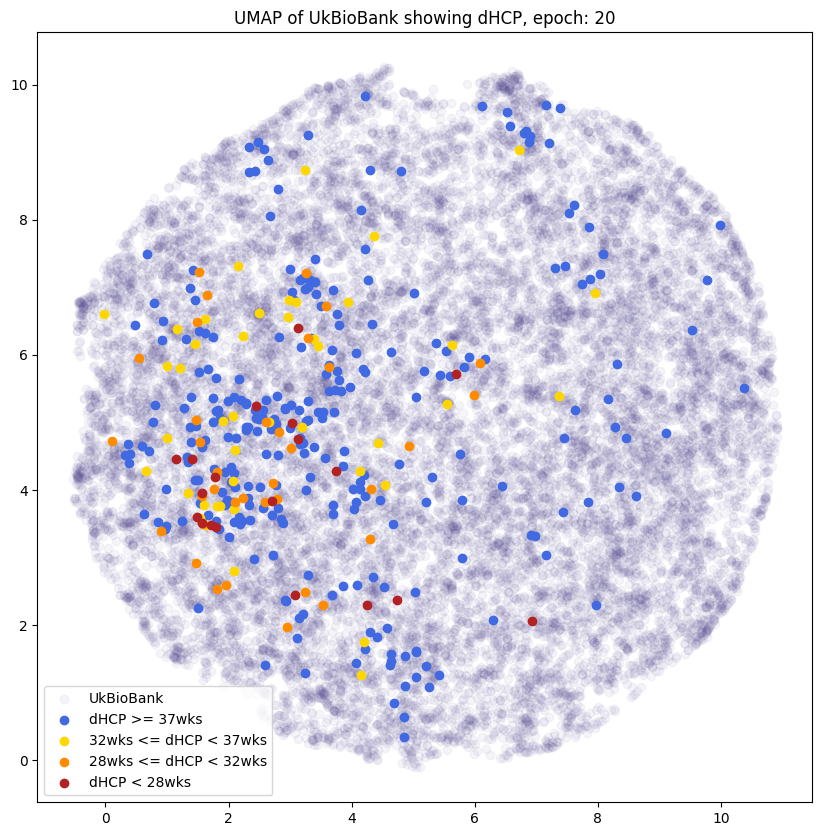

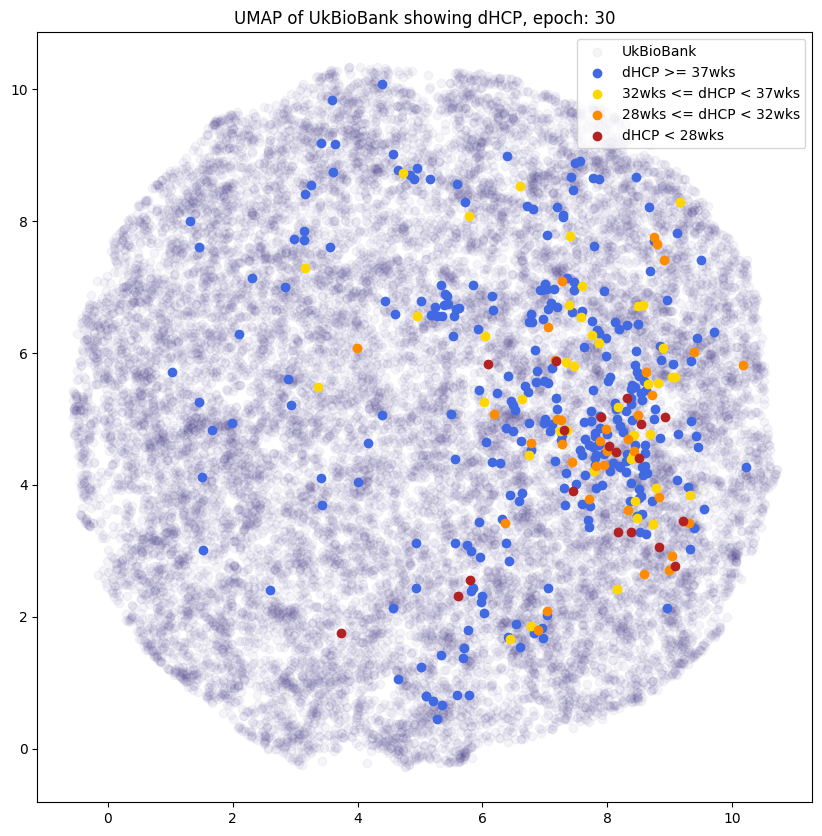

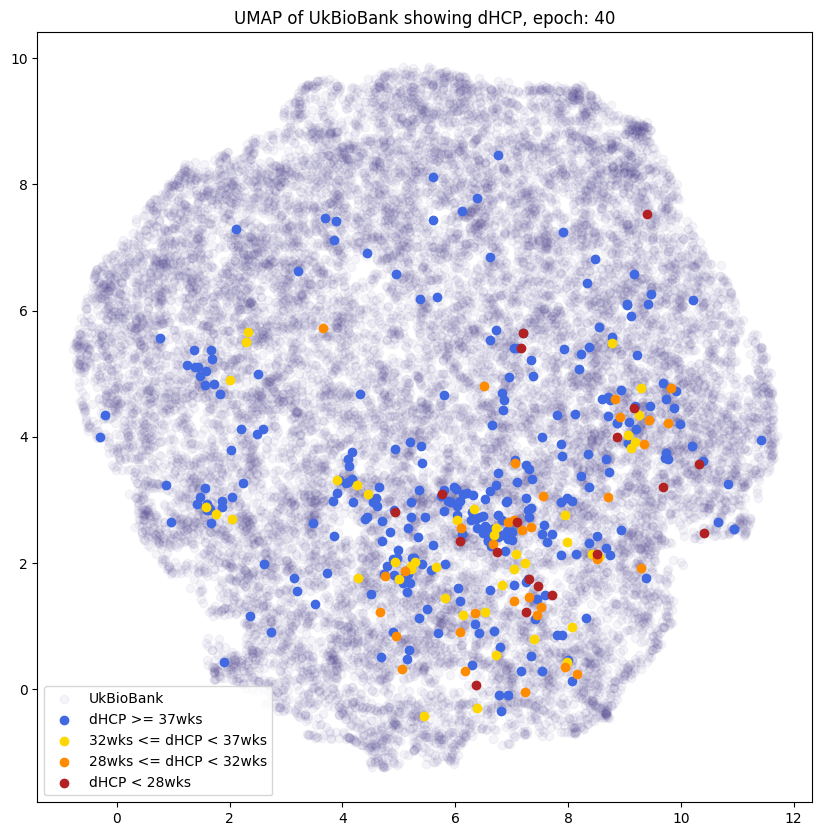

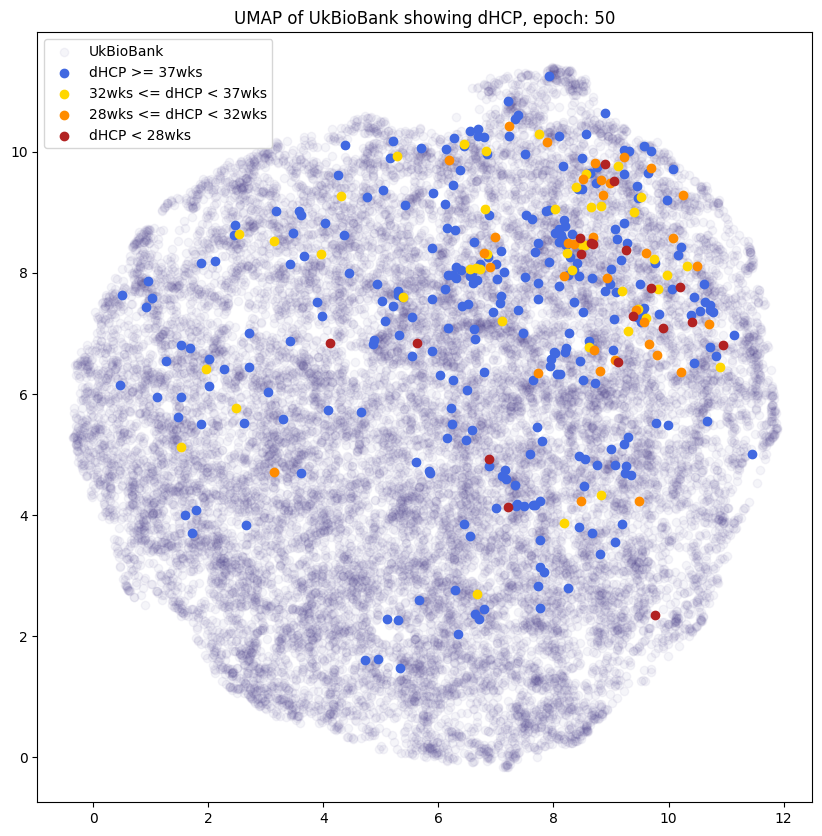

In [48]:
for epoch in epochs:
    ukb_embeddings = pd.read_csv(os.path.join(out_dir,model)+f'UKB_epoch{epoch}_embeddings/full_embeddings.csv')
    dHCP_embeddings = pd.read_csv(os.path.join(out_dir,model)+f'dHCP_epoch{epoch}_embeddings/full_embeddings.csv')

    # fit UMAP on UKB
    reducer = umap.UMAP()
    dims = [f'dim{k}' for k in range(1,11)]
    X = ukb_embeddings[dims]
    embeddings_ukb = reducer.fit_transform(X)

    # label 28
    preterm_28 = preterm_labels.loc[preterm_labels['birth_age']<28]
    embeddings_28 = dHCP_embeddings.loc[dHCP_embeddings['ID'].isin(preterm_28.Subject)]
    Y = embeddings_28[dims]
    embeddings_28 = reducer.transform(Y)

    # label 32
    preterm_32 = preterm_labels.loc[(preterm_labels['birth_age']<32) & (preterm_labels['birth_age']>=28)]
    embeddings_32 = dHCP_embeddings.loc[dHCP_embeddings['ID'].isin(preterm_32.Subject)]
    Y = embeddings_32[dims]
    embeddings_32 = reducer.transform(Y)

    # label 37
    preterm_37 = preterm_labels.loc[(preterm_labels['birth_age']<37) & (preterm_labels['birth_age']>=32)]
    embeddings_37 = dHCP_embeddings.loc[dHCP_embeddings['ID'].isin(preterm_37.Subject)]
    Y = embeddings_37[dims]
    embeddings_37 = reducer.transform(Y)

    # label 37
    fullterm = preterm_labels.loc[preterm_labels['birth_age']>=37]
    embeddings_fullterm = dHCP_embeddings.loc[dHCP_embeddings['ID'].isin(fullterm.Subject)]
    Y = embeddings_fullterm[dims]
    embeddings_fullterm = reducer.transform(Y)

    fig, ax = plt.subplots(figsize=(10,10))
    plt.scatter(embeddings_ukb[:,0], embeddings_ukb[:,1], alpha=0.05, label='UkBioBank', c='darkslateblue')
    plt.scatter(embeddings_fullterm[:, 0], embeddings_fullterm[:, 1], label='dHCP >= 37wks', c='royalblue')
    plt.scatter(embeddings_37[:, 0], embeddings_37[:, 1], label='32wks <= dHCP < 37wks', c='gold')
    plt.scatter(embeddings_32[:, 0], embeddings_32[:, 1], label='28wks <= dHCP < 32wks', c='darkorange')
    plt.scatter(embeddings_28[:, 0], embeddings_28[:, 1], label='dHCP < 28wks', c='firebrick')
    plt.legend()
    plt.title(f'UMAP of UkBioBank showing dHCP, epoch: {epoch}')
    plt.show()